# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/"
endpoint = "weather"
params = {"appid": weather_api_key}
api_req_url = url + endpoint

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{api_req_url}?q={city}&units=imperial&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        res = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = res["coord"]["lat"]
        city_lng = res["coord"]["lon"]
        city_max_temp = res["main"]["temp_max"]
        city_humidity =res["main"]["humidity"]
        city_clouds = res["clouds"]["all"]
        city_wind = res["wind"]["speed"]
        city_country = res["sys"]["country"]
        city_date = res["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sungai besar
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | mbanza-ngungu
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | bereket
Processing Record 6 of Set 1 | xichang
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | visakhapatnam
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | ust-nera
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | bereznik
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | santa ana de yacuma
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 

Processing Record 42 of Set 4 | catumbela
Processing Record 43 of Set 4 | krasnoarmeyskaya
Processing Record 44 of Set 4 | hami
Processing Record 45 of Set 4 | klyuchi
Processing Record 46 of Set 4 | koyulhisar
Processing Record 47 of Set 4 | college
Processing Record 48 of Set 4 | nyurba
Processing Record 49 of Set 4 | margate
Processing Record 0 of Set 5 | burayevo
Processing Record 1 of Set 5 | buala
Processing Record 2 of Set 5 | merritt
Processing Record 3 of Set 5 | pisco
Processing Record 4 of Set 5 | utrik
Processing Record 5 of Set 5 | mejit
Processing Record 6 of Set 5 | east london
Processing Record 7 of Set 5 | ancud
Processing Record 8 of Set 5 | petropavlovsk-kamchatsky
Processing Record 9 of Set 5 | minas de marcona
Processing Record 10 of Set 5 | keflavik
Processing Record 11 of Set 5 | vila velha
Processing Record 12 of Set 5 | nuuk
Processing Record 13 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 14 of Set 5 | fray luis beltran
Processing

Processing Record 33 of Set 8 | tsiombe
Processing Record 34 of Set 8 | aykhal
Processing Record 35 of Set 8 | nikolayevsk-on-amure
Processing Record 36 of Set 8 | winnemucca
Processing Record 37 of Set 8 | ageyevo
Processing Record 38 of Set 8 | mtwara
Processing Record 39 of Set 8 | kone
Processing Record 40 of Set 8 | espargos
City not found. Skipping...
Processing Record 41 of Set 8 | puerto tirol
Processing Record 42 of Set 8 | ialibu
Processing Record 43 of Set 8 | sandnessjoen
Processing Record 44 of Set 8 | berryville
Processing Record 45 of Set 8 | susuman
Processing Record 46 of Set 8 | tobruk
Processing Record 47 of Set 8 | kitui
Processing Record 48 of Set 8 | la sarre
Processing Record 49 of Set 8 | martin
Processing Record 0 of Set 9 | kandiari
Processing Record 1 of Set 9 | oumache
Processing Record 2 of Set 9 | fisterra
Processing Record 3 of Set 9 | toliara
Processing Record 4 of Set 9 | laojunmiao
Processing Record 5 of Set 9 | isiro
Processing Record 6 of Set 9 | con

Processing Record 24 of Set 12 | peniche
Processing Record 25 of Set 12 | bamboo flat
Processing Record 26 of Set 12 | beloyarskiy
Processing Record 27 of Set 12 | sarangani
Processing Record 28 of Set 12 | alpena
Processing Record 29 of Set 12 | mandapam
Processing Record 30 of Set 12 | ganshui
Processing Record 31 of Set 12 | rouyn-noranda
Processing Record 32 of Set 12 | howard springs
Processing Record 33 of Set 12 | sitia
Processing Record 34 of Set 12 | ocean shores
Processing Record 35 of Set 12 | saint-georges
Processing Record 36 of Set 12 | tazovsky
Processing Record 37 of Set 12 | fort st. john
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sungai besar,3.6746,100.9867,78.53,86,100,6.53,MY,1683574541
1,thompson,55.7435,-97.8558,69.96,30,20,6.91,CA,1683574541
2,mbanza-ngungu,-5.2500,14.8667,70.88,92,97,2.28,CD,1683574541
3,port-aux-francais,-49.3500,70.2167,41.61,95,100,39.48,TF,1683574542
4,bereket,39.2446,55.5154,76.82,34,98,8.30,TM,1683574542


In [6]:
# Export the City_Data into a csv
os.makedirs("output_data", exist_ok=True)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sungai besar,3.6746,100.9867,78.53,86,100,6.53,MY,1683574541
1,thompson,55.7435,-97.8558,69.96,30,20,6.91,CA,1683574541
2,mbanza-ngungu,-5.2500,14.8667,70.88,92,97,2.28,CD,1683574541
3,port-aux-francais,-49.3500,70.2167,41.61,95,100,39.48,TF,1683574542
4,bereket,39.2446,55.5154,76.82,34,98,8.30,TM,1683574542


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

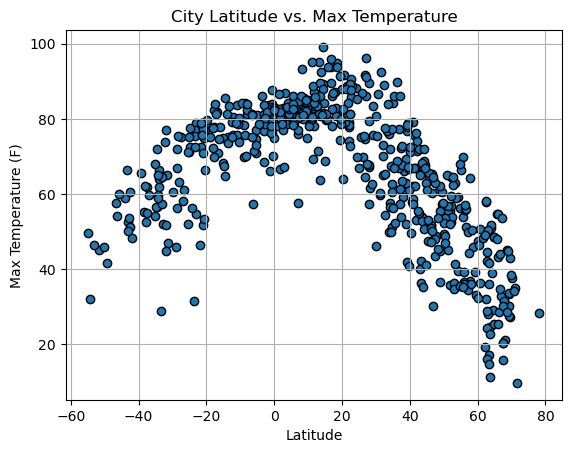

In [15]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

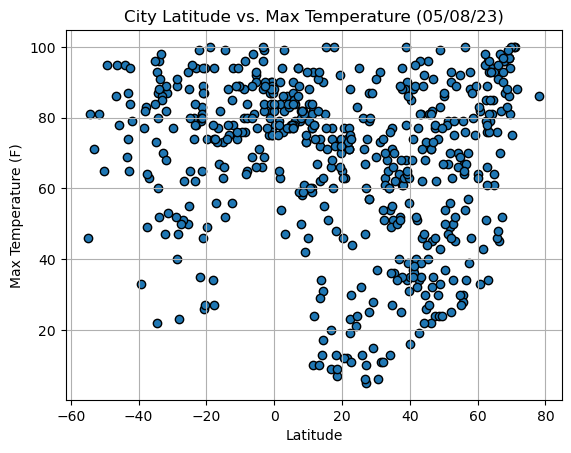

In [18]:
plt.scatter( city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Max Temperature ({})".format(time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid(True)

plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

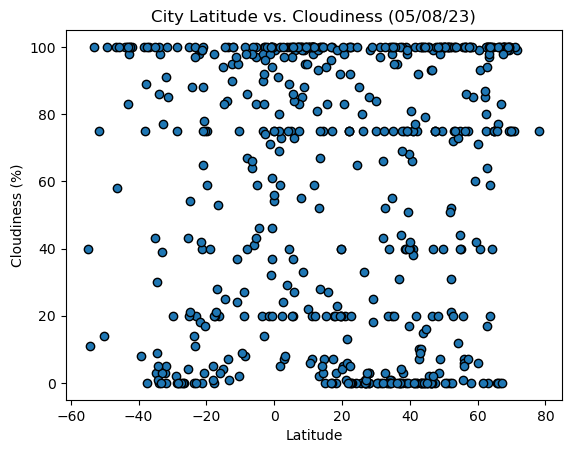

In [19]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Cloudiness ({})".format(time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5, 105)




# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

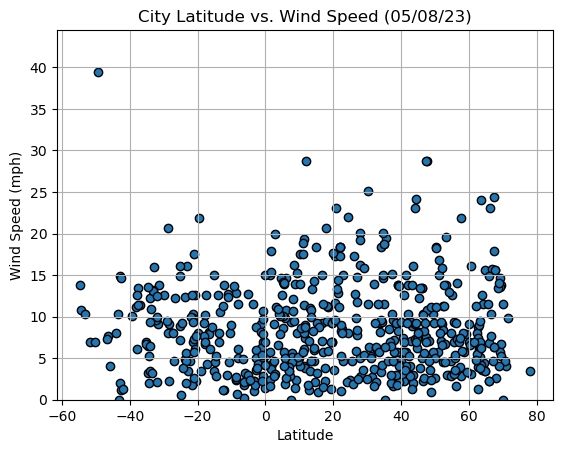

In [20]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Wind Speed ({})".format(time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0, city_data_df["Wind Speed"].max() + 5)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
   
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2:.2f}")
    plt.show()
    
    

The r-squared is: 0.21


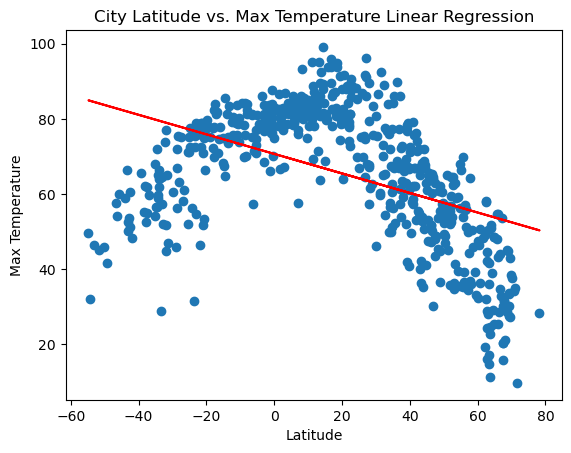

The r-squared is: 0.02


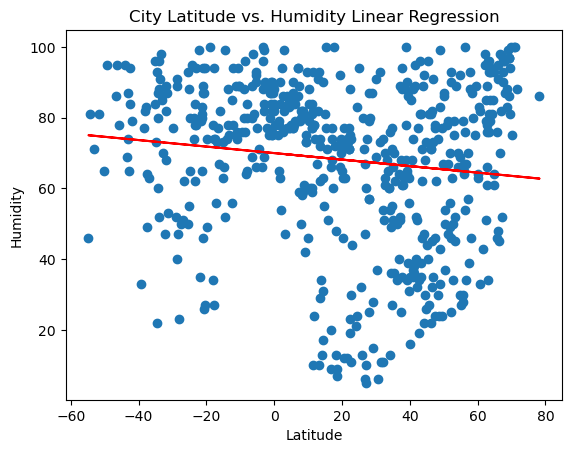

The r-squared is: 0.00


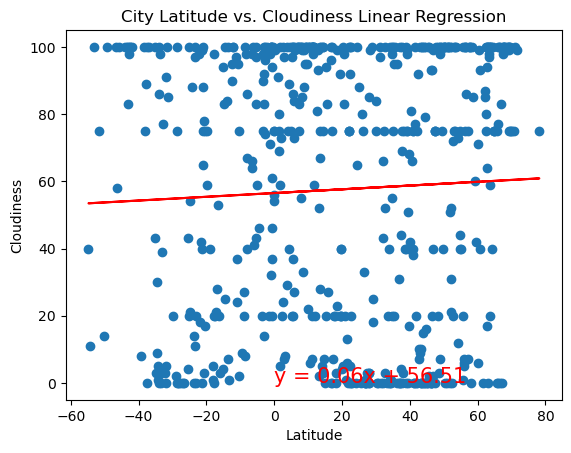

The r-squared is: 0.00


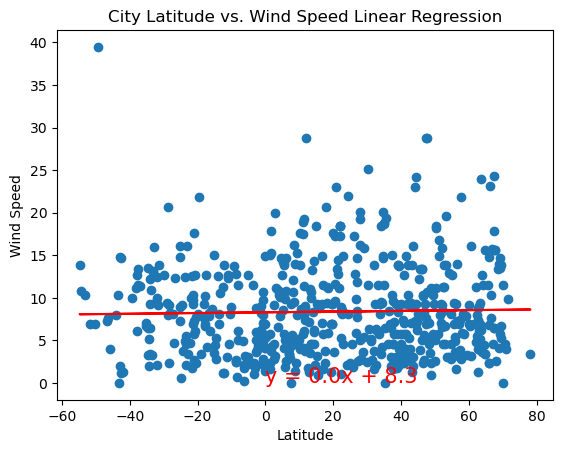

In [22]:
plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature", "City Latitude vs. Max Temperature Linear Regression", (0,0))
plot_linear_regression(city_data_df["Lat"], city_data_df["Humidity"], "Latitude", "Humidity", "City Latitude vs. Humidity Linear Regression", (0,0))
plot_linear_regression(city_data_df["Lat"], city_data_df["Cloudiness"], "Latitude", "Cloudiness", "City Latitude vs. Cloudiness Linear Regression", (0,0))
plot_linear_regression(city_data_df["Lat"], city_data_df["Wind Speed"], "Latitude", "Wind Speed", "City Latitude vs. Wind Speed Linear Regression", (0,0))

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sungai besar,3.6746,100.9867,78.53,86,100,6.53,MY,1683574541
1,thompson,55.7435,-97.8558,69.96,30,20,6.91,CA,1683574541
4,bereket,39.2446,55.5154,76.82,34,98,8.30,TM,1683574542
5,xichang,27.8964,102.2634,57.38,79,3,2.68,CN,1683574542
6,talnakh,69.4865,88.3972,27.21,94,100,6.69,RU,1683574542


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mbanza-ngungu,-5.2500,14.8667,70.88,92,97,2.28,CD,1683574541
3,port-aux-francais,-49.3500,70.2167,41.61,95,100,39.48,TF,1683574542
8,edinburgh of the seven seas,-37.0676,-12.3116,59.81,63,100,11.43,SH,1683574543
9,bredasdorp,-34.5322,20.0403,56.44,93,30,3.27,ZA,1683574543
11,port mathurin,-19.6833,63.4167,78.48,74,59,21.88,MU,1683574543


###  Temperature vs. Latitude Linear Regression Plot

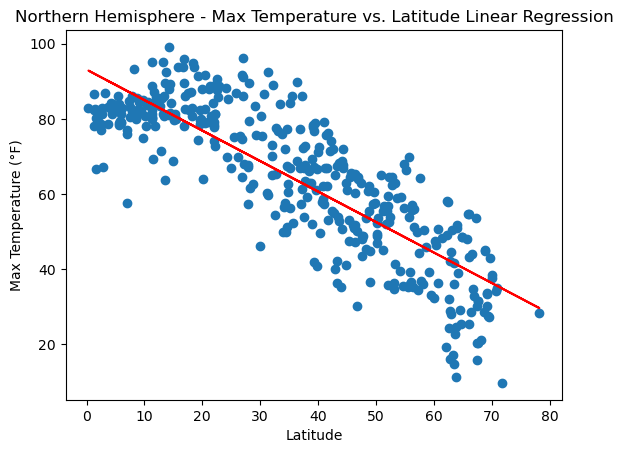

In [26]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
r_squared = f"R² = {rvalue**2:.2f}"
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0, 0), fontsize=15, color="red")
plt.annotate(r_squared, (0, -20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.show()

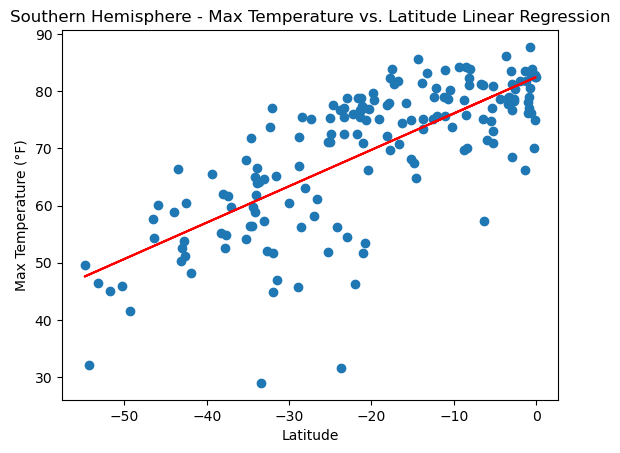

In [29]:
# Linear regression on Southern Hemisphere
# # Create scatter plot of latitude vs. max temperature for Northern Hemisphere cities
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
r_squared = f"R² = {rvalue**2:.2f}"
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0, 0), fontsize=15, color="red")
plt.annotate(r_squared, (0, -20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.show()

**Discussion about the linear relationship:** one should clearly see that as you get closer to the equator temperatures rise. 

### Humidity vs. Latitude Linear Regression Plot

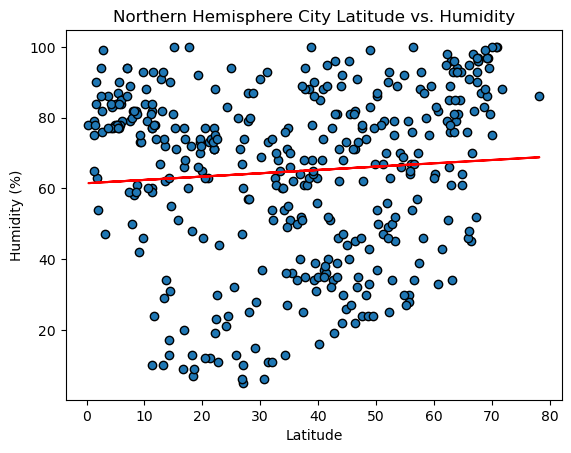

In [36]:
# Northern Hemisphere

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolors="black")

# Add linear regression line to scatter plot
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")

# Add labels and title to scatter plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere City Latitude vs. Humidity")

# Show scatter plot
plt.show()

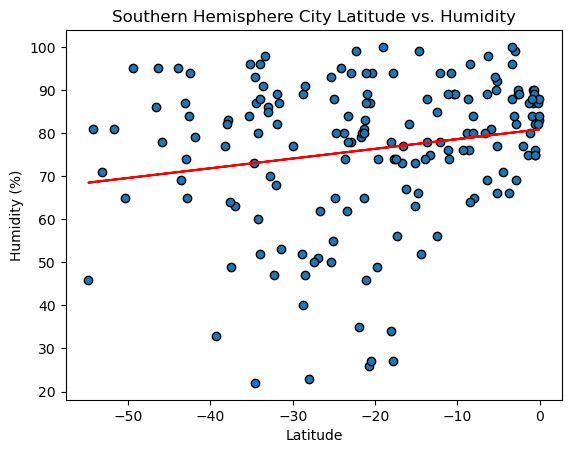

In [37]:
# Southern Hemisphere

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", edgecolors="black")
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere City Latitude vs. Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

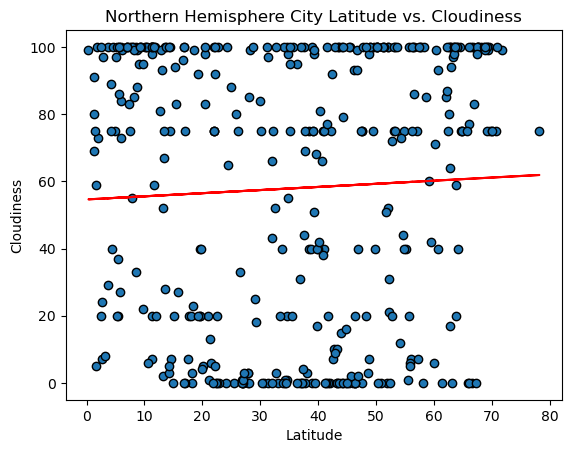

In [38]:
# Northern Hemisphere
# 
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", edgecolors="black")
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness")
plt.show()

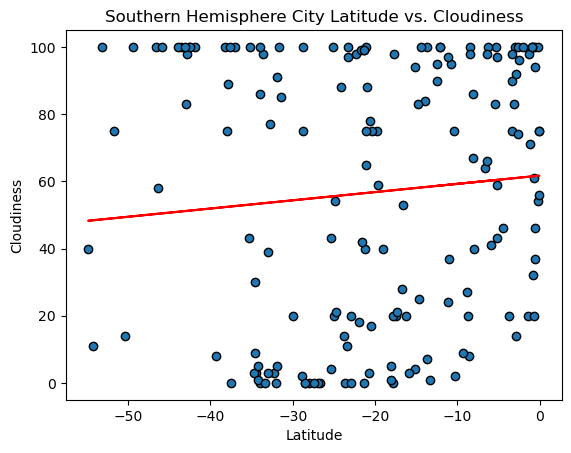

In [39]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", edgecolors="black")
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

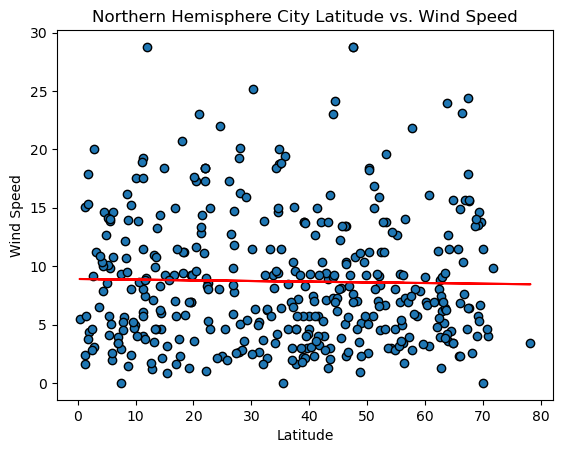

In [41]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", edgecolors="black")
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed")
plt.show()

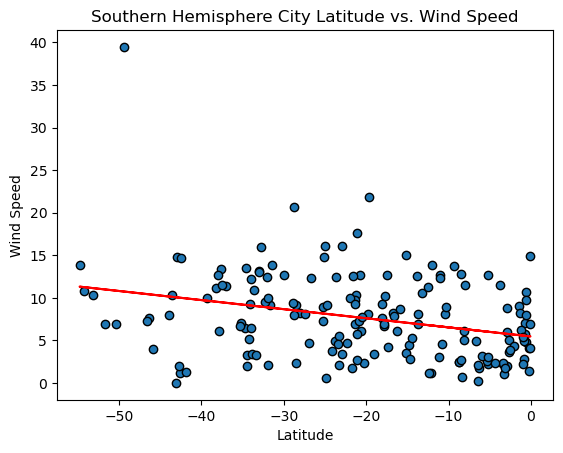

In [40]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", edgecolors="black")
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE